In [38]:
import statsmodels.api as sm
import scipy.stats as stats

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
    

['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR']
TOTEMP


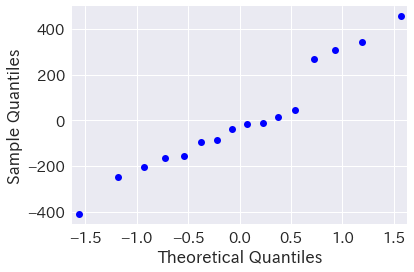

In [21]:
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
print(data.exog_name)
print(data.endog_name)

mod_fit = sm.OLS(data.endog, data.exog).fit()
res = mod_fit.resid
fig = sm.qqplot(res)

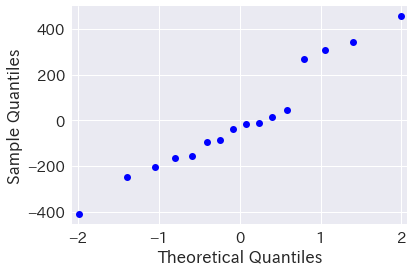

In [27]:
fig = sm.qqplot(res, stats.t, distargs=(4,))

In [36]:
a, b, loc, scale = stats.beta.fit(res, floc=res.min()*1.001, fscale=res.max()*1.001)
mean, var, skew, kurt = stats.beta.stats(a, b, moments='mvsk')

fig = sm.qqplot(res, dist=stats.beta, line='45', loc=loc, scale=scale,
                distargs=(a,b,))

FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that -410.52473654942349 < x < 45.32475210263533 for each x in `data`.

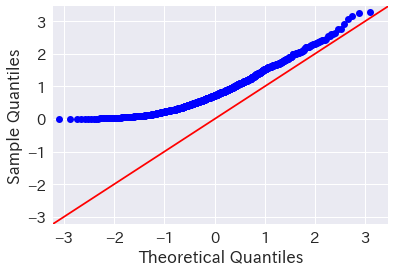

In [39]:
import numpy as np
test = abs(np.random.normal(0,1, 1000))
fig = sm.qqplot(test, line='45')